<a href="https://colab.research.google.com/github/Thiago-Magnago/NLP_Coronavirus_Tweets_Sentiment/blob/main/NLP_Coronavirus_Tweets_Sentiment_CNN_LSTM_GloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load Data

# Train base
df = pd.read_csv("Corona_NLP_train.csv", encoding = "ISO-8859-1")
df = df[['OriginalTweet','Sentiment']]

# Test base
df_test = pd.read_csv("Corona_NLP_test.csv", encoding = "ISO-8859-1")
df_test = df_test[['OriginalTweet','Sentiment']]

df.tail()

,OriginalTweet,Sentiment
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
df_test.tail()

,OriginalTweet,Sentiment
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative
3797,I and @ForestandPaper members are committed to...,Extremely Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  3798 non-null   object
 1   Sentiment      3798 non-null   object
dtypes: object(2)
memory usage: 59.5+ KB


# Exploratory Data Analysis

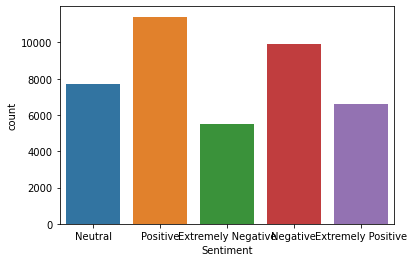

In [ ]:
# inspect sentiment
sns.countplot(df['Sentiment'])

In [ ]:
# text length
df['text_length'] = df['OriginalTweet'].apply(len)
df.head()

,OriginalTweet,Sentiment,text_length
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,advice Talk to your neighbours family to excha...,Positive,237
2,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,My food stock is not the only one which is emp...,Positive,306
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310


In [ ]:
df['text_length'].describe()

count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: text_length, dtype: float64

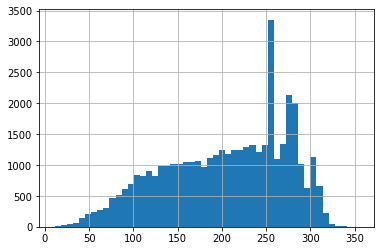

In [ ]:
df['text_length'].hist(bins=50)

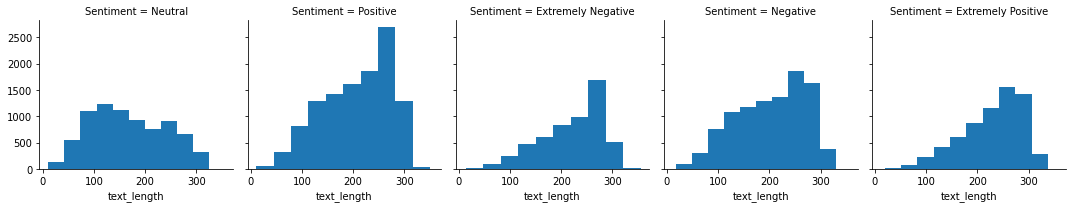

In [ ]:
g = sns.FacetGrid(df,col='Sentiment')
g.map(plt.hist,'text_length')

In [ ]:
# Compiling labels from 5 to 3. 
# New labels: Negative, Positive, Neutral.
conditionlist = [
    (df['Sentiment'] == 'Negative'),
    (df['Sentiment'] == 'Extremely Negative'),
    (df['Sentiment'] == 'Positive'),
    (df['Sentiment'] == 'Extremely Positive'),
    (df['Sentiment'] == 'Neutral')
    ]
choicelist = ['Negative', 'Negative', 'Positive', 'Positive', 'Neutral']
df['NewSentiment'] = np.select(conditionlist, choicelist, default='Not Specified')

df.head()

,OriginalTweet,Sentiment,text_length,NewSentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,Neutral
1,advice Talk to your neighbours family to excha...,Positive,237,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,Positive
3,My food stock is not the only one which is emp...,Positive,306,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,Negative


In [ ]:
# Applying compilation of labels on test base too. 
# New labels: Negative, Positive, Neutral.

conditionlist = [
    (df_test['Sentiment'] == 'Negative'),
    (df_test['Sentiment'] == 'Extremely Negative'),
    (df_test['Sentiment'] == 'Positive'),
    (df_test['Sentiment'] == 'Extremely Positive'),
    (df_test['Sentiment'] == 'Neutral')
    ]
choicelist = ['Negative', 'Negative', 'Positive', 'Positive', 'Neutral']
df_test['NewSentiment'] = np.select(conditionlist, choicelist, default='Not Specified')

df_test.head()

,OriginalTweet,Sentiment,NewSentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive,Positive
2,Find out how you can protect yourself and love...,Extremely Positive,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,Neutral


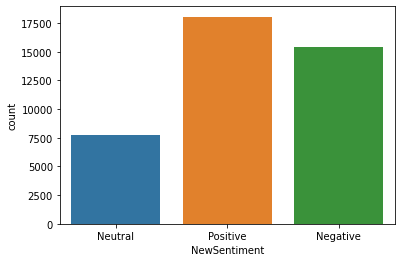

In [ ]:
# inspect NewSentiment
sns.countplot(df['NewSentiment'])

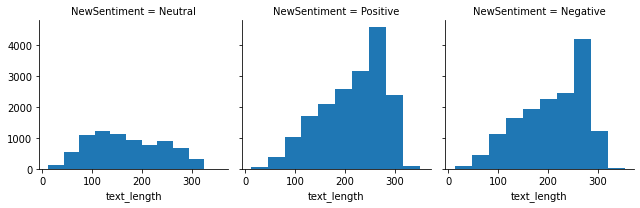

In [ ]:
g = sns.FacetGrid(df,col='NewSentiment')
g.map(plt.hist,'text_length')

###Balancing (not applied)

In [ ]:
# Balancing was tried, but it didn´t have a better result
'''#Limitando a 7500,que é a quantidade de "Neutral"
pos_df = df[ df['NewSentiment'] == 'Positive'][:7500]
neg_df = df[ df['NewSentiment'] == 'Negative'][:7500]
neut_df = df[ df['NewSentiment'] == 'Neutral']
df = pd.concat([pos_df, neg_df])

In [ ]:
'''pos_df.shape

(7500, 4)

In [ ]:
'''df.shape

(15000, 4)

In [ ]:
'''#Juntando Neutral aos demais
df = pd.concat([neut_df, df])


In [ ]:
'''df.shape

(22713, 4)

In [ ]:
'''df.head()

,OriginalTweet,Sentiment,text_length,NewSentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,Neutral
7,Was at the supermarket today. Didn't buy toile...,Neutral,119,Neutral
10,All month there hasn't been crowding in the su...,Neutral,276,Neutral
16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral,204,Neutral
17,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral,209,Neutral


###Cleaning data

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
my_text1 = df['OriginalTweet']
my_text2 = df_test['OriginalTweet']

In [ ]:
# Function: removal of stopwords and unwanted caracters.
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','').replace(',','').replace('#','').replace('?','')
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
# Applying the function on train base

df['clean_text']= [Preprocessing(i) for i in my_text1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Applying the function on test base too
df_test['clean_text']= [Preprocessing(i) for i in my_text2]

In [ ]:
df.head()

,OriginalTweet,Sentiment,text_length,NewSentiment,clean_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,Neutral,@menyrbie @phil_gahan @chrisitv
1,advice Talk to your neighbours family to excha...,Positive,237,Positive,advice talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,Positive,coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,306,Positive,food stock one empty please panic enough food ...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,Negative,ready go supermarket covid19 outbreak i'm para...


In [ ]:
df_test.head()

,OriginalTweet,Sentiment,NewSentiment,clean_text
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,Negative,trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,Positive,find hand sanitizer fred meyer turned amazon $...
2,Find out how you can protect yourself and love...,Extremely Positive,Positive,find protect loved ones coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Negative,Negative,panic buying hits newyork city anxious shopper...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,Neutral,toiletpaper dunnypaper coronavirus coronavirus...


# Data Preprocessing

In [ ]:
# Encode Categorical Variable
# Train Base
X_train = df['clean_text']
y_train = pd.get_dummies(df['NewSentiment']).values
num_classes = df['NewSentiment'].nunique()
y_train

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
# Encode Categorical Variable
# Test Base
X_test = df_test['clean_text']
y_test = pd.get_dummies(df_test['NewSentiment']).values
num_classes = df_test['NewSentiment'].nunique()
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

In [ ]:
# Tokenize Text
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

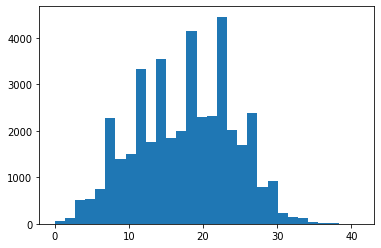

In [ ]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [ ]:
from keras.preprocessing import sequence
max_words = 200 #inicial era 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(41157, 200) (3798, 200)


# CNN-LSTM

In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 1

In [ ]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    return model

In [ ]:
def model_train(model):
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)
    # plot train history
    plot_model_history(model_history)

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
def model_evaluate(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 32)           9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 3)                 3

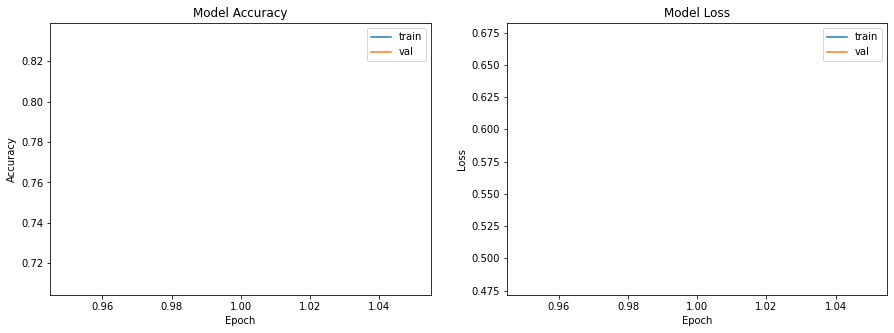

In [ ]:
# train the model
max_features = 20000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	83.3%


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1633
           1       0.81      0.73      0.77       619
           2       0.83      0.88      0.85      1546

    accuracy                           0.83      3798
   macro avg       0.83      0.81      0.82      3798
weighted avg       0.83      0.83      0.83      3798



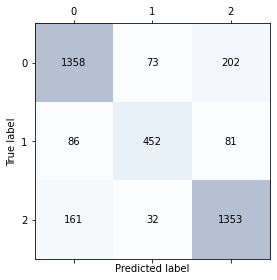

In [ ]:
# evaluate model with test set
model_evaluate()

# GloVe.27B.100d + CNN-LSTM

In [ ]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=20000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix

In [ ]:
def get_model(max_features, embed_dim, embedding_matrix):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],
                       weights=[embedding_matrix]))#,trainable=False
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/Desafio NLP'  # Insert the path
os.chdir(workdir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 1193515 word vectors.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 32)           9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)               

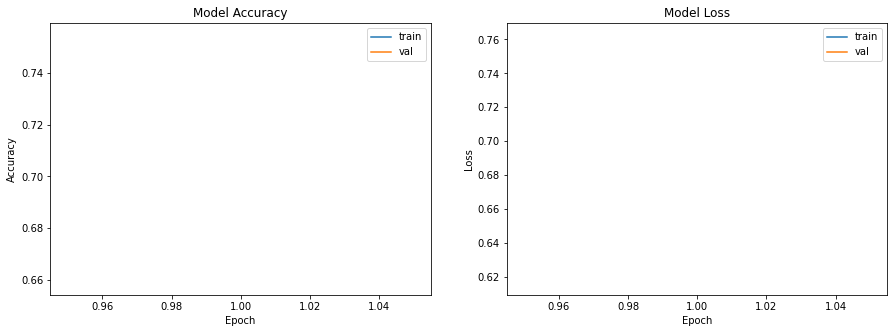

In [ ]:
# embedding matrix
EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

Accuracy:	75.5%


              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1633
           1       0.59      0.72      0.65       619
           2       0.77      0.81      0.79      1546

    accuracy                           0.75      3798
   macro avg       0.73      0.75      0.73      3798
weighted avg       0.76      0.75      0.76      3798



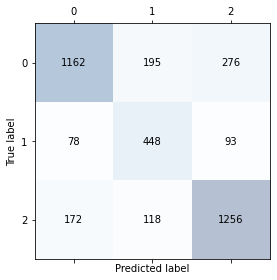

In [ ]:
# evaluate model with test set
model_evaluate()

'Frozing' the glove model

In [ ]:
def get_model(max_features, embed_dim, embedding_matrix):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],
                       weights=[embedding_matrix],trainable=False))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    return model

Found 1193515 word vectors.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 32)           9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)               

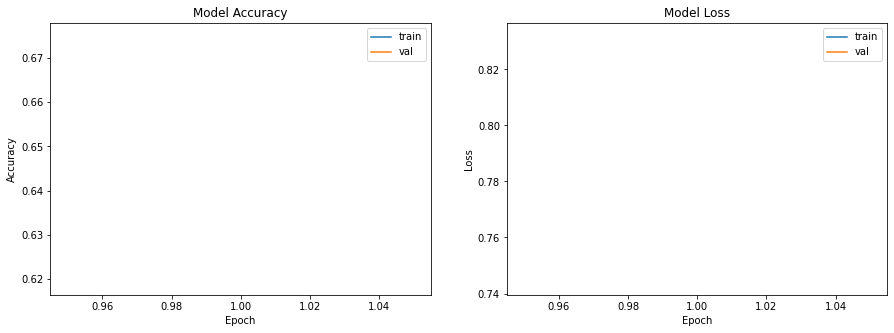

In [ ]:
# embedding matrix
EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

Accuracy:	67.5%


              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1633
           1       0.60      0.49      0.54       619
           2       0.68      0.68      0.68      1546

    accuracy                           0.68      3798
   macro avg       0.66      0.64      0.65      3798
weighted avg       0.67      0.68      0.67      3798



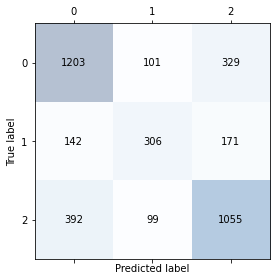

In [ ]:
# evaluate model with test set
model_evaluate()